In [3]:
%matplotlib inline

import os
import sys

PACKAGE_PARENT = '..'
sys.path.append(PACKAGE_PARENT)

import json
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from gaminet import GAMINetClassifier
from gaminet import GAMINetRegressor
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [4]:
from dataset import *
random_state = 0
train_x, test_x, train_y, test_y, task_type, meta_info = get_credit_default(random_state)

In [5]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def auc(label, pred, scaler=None):
    return roc_auc_score(label, pred)

get_metric = metric_wrapper(auc, None)

In [6]:
meta_info.keys()

dict_keys(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT456', 'FLAG_UTIL_RAT1', 'UTIL_RAT1', 'UTIL_RAT_AVG', 'UTIL_RAT_RANGE', 'UTIL_RAT_MAX', 'FLAG_PAY_RAT1', 'PAY_RAT1', 'PAY_RAT_AVG', 'PAY_RAT_RANGE', 'PAY_RAT_MAX', 'Default Payment'])

In [7]:
model = GAMINetClassifier(interact_num=10,
                          subnet_size_main_effect=[100] * 1,
                          subnet_size_interaction=[200] * 1, 
                          max_epochs=[1000, 1000, 1000],
                          learning_rates=[0.001, 0.001, 0.001],
                          early_stop_thres=["auto", "auto", "auto"],
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          reg_mono=0.1,
                          verbose=True,
                          random_state=random_state)
model.fit(train_x, train_y)

####################Stage 1: Main Effect Training####################
###############Run Warm Initialization for Main Effect###############


Epoch:    1, train loss: 0.44401, validation loss: 0.44038: 100%|██████████| 20/20 [00:00<00:00, 92.91it/s]                        
Epoch:    2, train loss: 0.43981, validation loss: 0.44026: 100%|██████████| 20/20 [00:00<00:00, 95.14it/s]                        
Epoch:    3, train loss: 0.44077, validation loss: 0.44693: 100%|██████████| 20/20 [00:00<00:00, 75.12it/s]                        
Epoch:    4, train loss: 0.44014, validation loss: 0.43988: 100%|██████████| 20/20 [00:00<00:00, 86.21it/s]                        
Epoch:    5, train loss: 0.43895, validation loss: 0.43967: 100%|██████████| 20/20 [00:00<00:00, 78.73it/s]                        
Epoch:    6, train loss: 0.43799, validation loss: 0.43894: 100%|██████████| 20/20 [00:00<00:00, 82.62it/s]                        
Epoch:    7, train loss: 0.43866, validation loss: 0.43954: 100%|██████████| 20/20 [00:00<00:00, 96.22it/s]                        
Epoch:    8, train loss: 0.43759, validation loss: 0.44092: 100%|██████████|

Main Effect Training Stop at Epoch: 11, train loss: 0.43768, validation loss: 0.44112
####################Stage 2: Interaction Training####################
###############Run Warm Initialization for Interaction###############


Epoch:    1, train loss: 0.44647, validation loss: 0.44629: 100%|██████████| 20/20 [00:00<00:00, 39.14it/s]                        
Epoch:    2, train loss: 0.43657, validation loss: 0.43672: 100%|██████████| 20/20 [00:00<00:00, 37.54it/s]                        
Epoch:    3, train loss: 0.43427, validation loss: 0.43600: 100%|██████████| 20/20 [00:00<00:00, 39.67it/s]                        
Epoch:    4, train loss: 0.43352, validation loss: 0.43682: 100%|██████████| 20/20 [00:00<00:00, 42.52it/s]                        
Epoch:    5, train loss: 0.43305, validation loss: 0.43532: 100%|██████████| 20/20 [00:00<00:00, 40.10it/s]                        
Epoch:    6, train loss: 0.43250, validation loss: 0.43643: 100%|██████████| 20/20 [00:00<00:00, 41.31it/s]                        
Epoch:    7, train loss: 0.43272, validation loss: 0.43707: 100%|██████████| 20/20 [00:00<00:00, 33.60it/s]                        
Epoch:    8, train loss: 0.43218, validation loss: 0.43748: 100%|██████████|

Interaction Training Stop at Epoch: 10, train loss: 0.43208, validation loss: 0.43560
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.43800, validation loss: 0.43552: 100%|██████████| 20/20 [00:00<00:00, 33.32it/s]                        
Epoch:    2, train loss: 0.43359, validation loss: 0.43625: 100%|██████████| 20/20 [00:00<00:00, 39.84it/s]                        
Epoch:    3, train loss: 0.43306, validation loss: 0.43532: 100%|██████████| 20/20 [00:00<00:00, 40.49it/s]                        
Epoch:    4, train loss: 0.43279, validation loss: 0.43704: 100%|██████████| 20/20 [00:00<00:00, 36.28it/s]                        
Epoch:    5, train loss: 0.43268, validation loss: 0.43489: 100%|██████████| 20/20 [00:00<00:00, 38.12it/s]                        
Epoch:    6, train loss: 0.43270, validation loss: 0.43462: 100%|██████████| 20/20 [00:00<00:00, 35.18it/s]                        
Epoch:    7, train loss: 0.43225, validation loss: 0.43547: 100%|██████████| 20/20 [00:00<00:00, 39.84it/s]                        
Epoch:    8, train loss: 0.43299, validation loss: 0.43778: 100%|██████████|

Fine Tuning Stop at Epoch: 16, train loss: 0.43270, validation loss: 0.43455


In [8]:
pred_train = model.predict_proba(train_x)[:, 1]
pred_test = model.predict_proba(test_x)[:, 1]
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train.ravel()),5),
                          np.round(get_metric(test_y, pred_test.ravel()),5)])
print(gaminet_stat)

[0.78265 0.78022]


In [9]:
gaminet_stat = np.hstack([np.round(np.mean(train_y.ravel() == (pred_train > 0.5).ravel()),5),
                          np.round(np.mean(test_y.ravel() == (pred_test > 0.5).ravel()),5)])
print(gaminet_stat)

[0.818   0.82583]


In [12]:
model.certify_mono()

True

In [13]:
for i in model.mono_increasing_list + model.mono_decreasing_list:
    model.partial_derivatives(i)

Global Interpretation

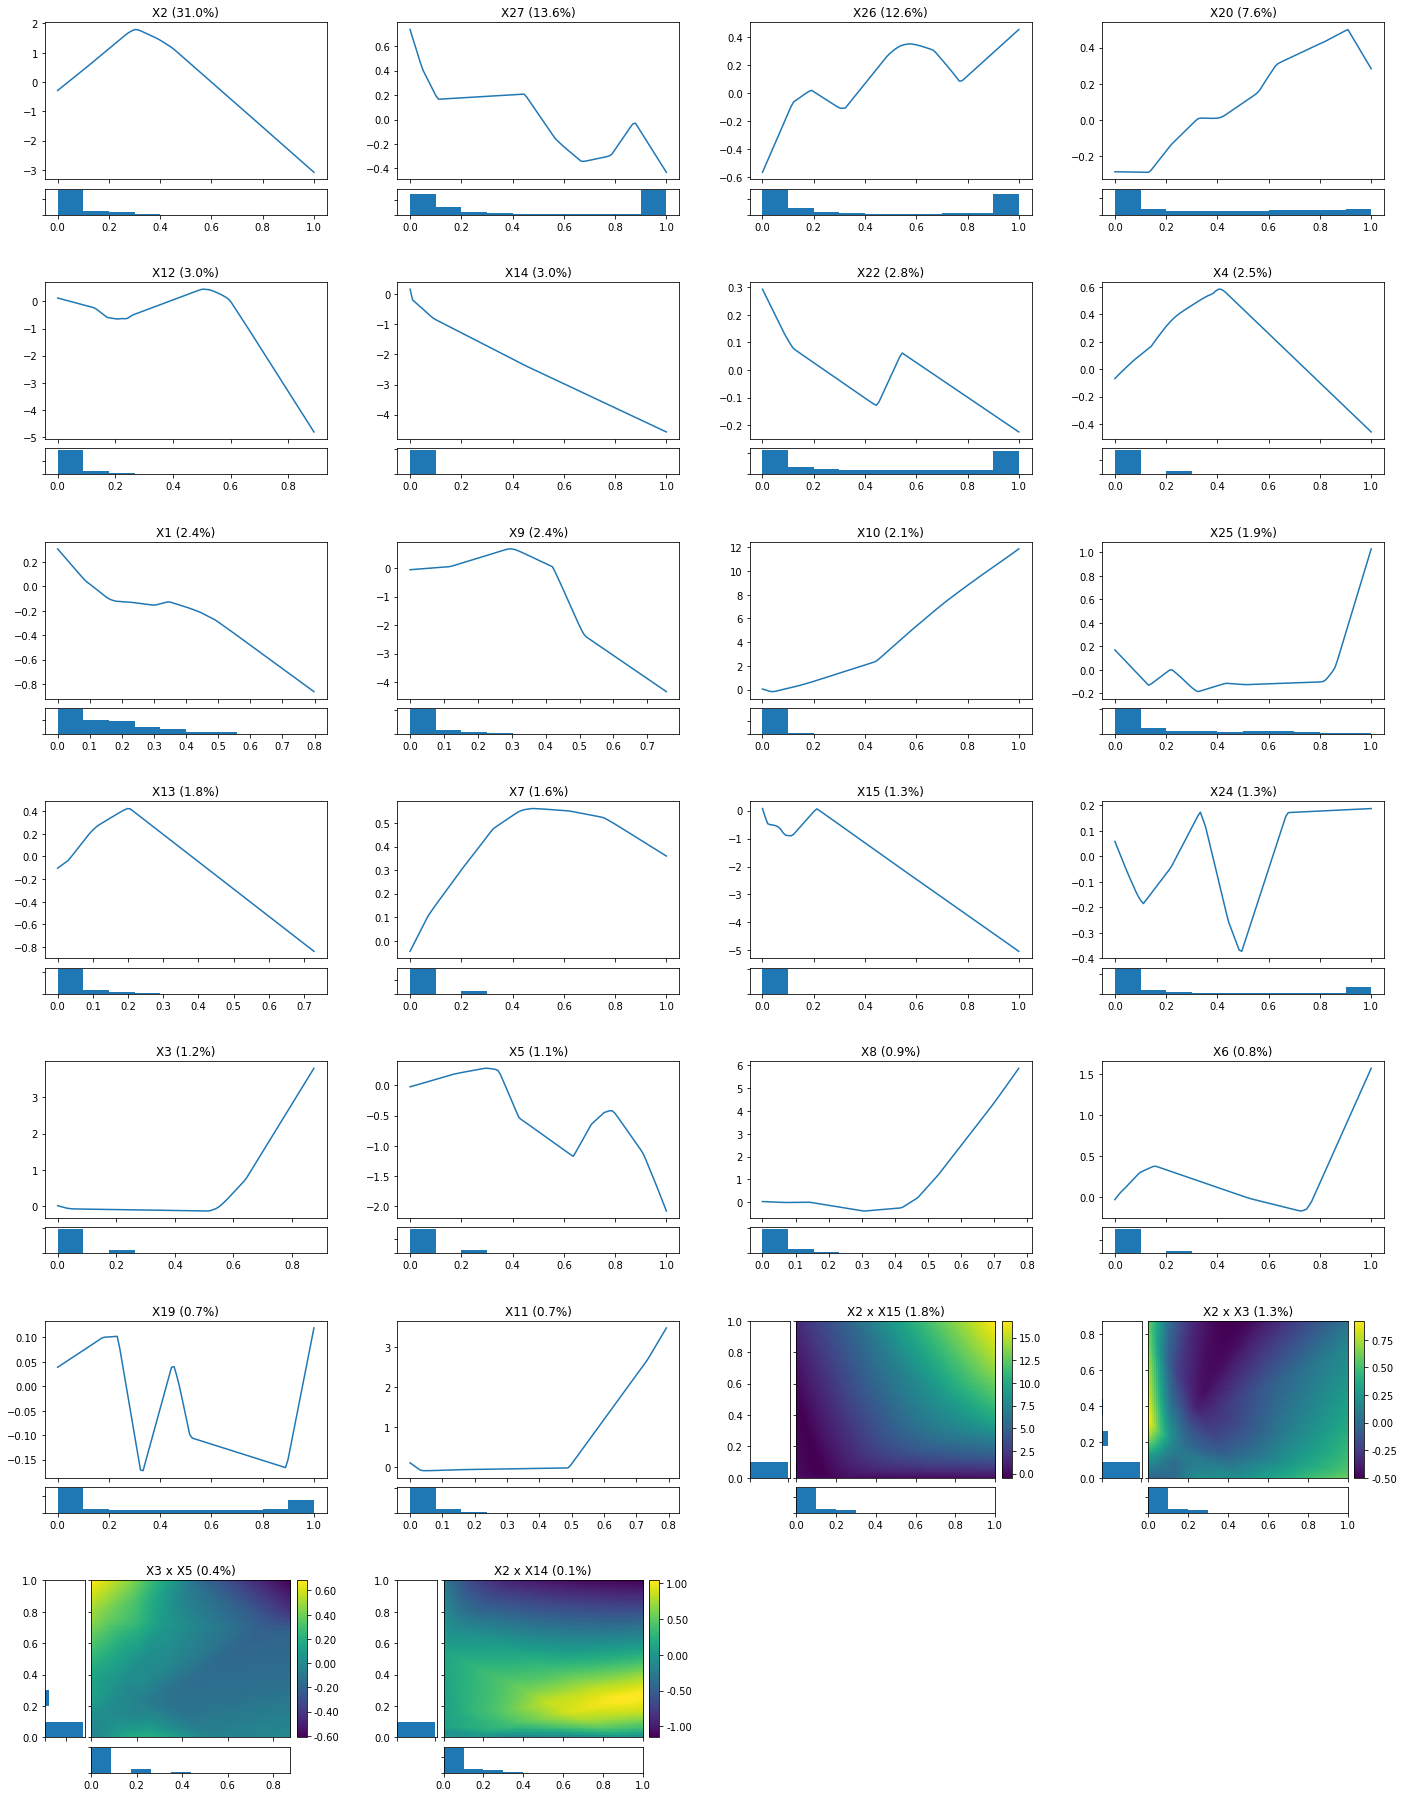

In [14]:
data_dict_global = model.global_explain(save_dict=False)
global_visualize_density(data_dict_global, main_effect_num=40, interaction_num=4, cols_per_row=4)

Feature Importance

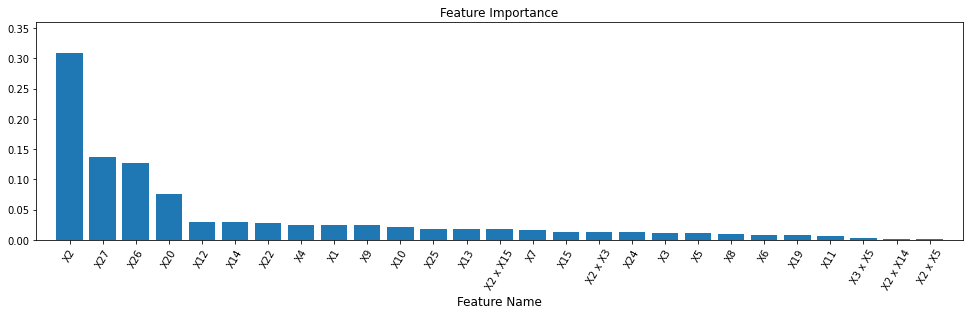

In [15]:
data_dict_global = model.global_explain(save_dict=False)
feature_importance_visualize(data_dict_global)